In [1]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mugheesahmad/sh17-dataset-for-ppe-detection")

print("Path to dataset files:", path)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Ильяс\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


Path to dataset files: C:\Users\Ильяс\.cache\kagglehub\datasets\mugheesahmad\sh17-dataset-for-ppe-detection\versions\1


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dropout,Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D,AveragePooling2D,Conv2DTranspose, Input, Concatenate, Add, BatchNormalization, Activation, MultiHeadAttention
from ipywidgets import IntProgress
from IPython.display import display
import os
import cv2
import PIL
import PIL.Image
import json
import random
from random import randint as rand
from os import listdir
from os.path import isfile, join
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[]


In [3]:
def update(file_path: str, root: str):
    with open(file_path, "r") as file:
        paths = file.readlines()

    updated_paths = list[str]()
    for path in paths:
        path = path.strip()
        updated_paths.append(root + path.split()[0] + "\n")

    new_file_path = r"C:\Users\Ильяс\.cache\roboflow\PPE.v14i.yolokeras\update_" + os.path.basename(file_path).split()[0]

    with open(new_file_path, "w") as file:
        file.writelines(updated_paths)

    print("Updated file created successfully: " + new_file_path)

In [4]:
root = "C:\\Users\\Ильяс\\.cache\\roboflow\\PPE.v14i.yolokeras\\train\\"
update(file_path=r"C:\Users\Ильяс\.cache\roboflow\PPE.v14i.yolokeras\train\_annotations.txt", root=root)
# update(file_path=r"C:\\Users\\Ильяс\\.cache\\kagglehub\\datasets\\mugheesahmad\\sh17-dataset-for-ppe-detection\\versions\\1\\val_files.txt", root=root)

Updated file created successfully: C:\Users\Ильяс\.cache\roboflow\PPE.v14i.yolokeras\update__annotations.txt


In [5]:
def create_labels(file_path : str):
    with open(file_path, 'r') as file:

        lines = file.readlines()
        
        labels = []
        names = []
        for line in lines:
            w, h = PIL.Image.open('C:\\Users\\Ильяс\\.cache\\roboflow\\PPE.v14i.yolokeras\\train\\' + line.split()[0]).size
            li = [el for el in line.split()]

            for i,el in enumerate(li[1:]):
                el = el.split(',')
                print(el)
                el = ' '.join([str(int(el[-1]) + 1)] + [str(int(e) / (w if j % 2 == 0 else h) ) for j, e in enumerate(el[:-1])])
                print(el)
                li[i + 1] = el

            
                    
            labels.append('\n'.join(li[1:]) if len(li) > 1 else ' ')
            names.append(li[0])

    for i, name in enumerate(names):
        labels_path = 'C:\\Users\\Ильяс\\.cache\\roboflow\\PPE.v14i.yolokeras\\train\\labels\\' + name + '.txt'
        with open(labels_path, 'w') as file:
            file.write(labels[i])
            

In [6]:
create_labels(file_path=r"C:\Users\Ильяс\.cache\roboflow\PPE.v14i.yolokeras\train\_annotations.txt")

['279', '176', '386', '381', '4']
5 0.4359375 0.275 0.603125 0.5953125
['394', '158', '453', '334', '4']
5 0.615625 0.246875 0.7078125 0.521875
['105', '162', '222', '316', '4']
5 0.1640625 0.253125 0.346875 0.49375
['466', '163', '558', '339', '4']
5 0.728125 0.2546875 0.871875 0.5296875
['159', '68', '288', '198', '1']
2 0.2484375 0.10625 0.45 0.309375
['268', '85', '367', '188', '1']
2 0.41875 0.1328125 0.5734375 0.29375
['357', '58', '446', '176', '1']
2 0.5578125 0.090625 0.696875 0.275
['446', '68', '533', '181', '1']
2 0.696875 0.10625 0.8328125 0.2828125
['77', '39', '275', '576', '3']
4 0.1203125 0.0609375 0.4296875 0.9
['249', '37', '402', '628', '3']
4 0.3890625 0.0578125 0.628125 0.98125
['351', '53', '458', '537', '3']
4 0.5484375 0.0828125 0.715625 0.8390625
['435', '30', '563', '530', '3']
4 0.6796875 0.046875 0.8796875 0.828125
['492', '32', '621', '250', '0']
1 0.76875 0.05 0.9703125 0.390625
['238', '187', '360', '461', '4']
5 0.371875 0.2921875 0.5625 0.7203125
['204

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
def get_test_data():
    path = 'C:\\Users\\Ильяс\\.cache\\roboflow\\street_work\\update__annotations.txt'
    data = open(path, 'r').readlines()

    for el in data:
        path_image = el[:-1]
        path_label = 'C:\\Users\\Ильяс\\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\train\\labels\\' +\
          path_image.split('\\')[-1] + '.txt'

        label = open(path_label, 'r').readlines()
        label = [el.split() for el in label]

        yield [PIL.Image.open(path_image), label]

In [9]:
def get_data():
  path = r'C:\Users\Ильяс\.cache\roboflow\PPE.v14i.yolokeras\update__annotations.txt'
  data = open(path, 'r').readlines()
  for el in data:
    path_image = el[:-1]
    path_label = 'C:\\Users\\Ильяс\\.cache\\roboflow\\PPE.v14i.yolokeras\\train\\labels\\' +\
      path_image.split('\\')[-1] + '.txt'

    label = open(path_label, 'r').readlines()
    label = [el.split() for el in label]

    image = tf.image.resize(mpimg.imread(path_image), (224, 224)) / 255
    
    yield [image, label, PIL.Image.open(path_image).size, path_label]

In [10]:
data = get_data()

In [11]:
img_data = next(data)

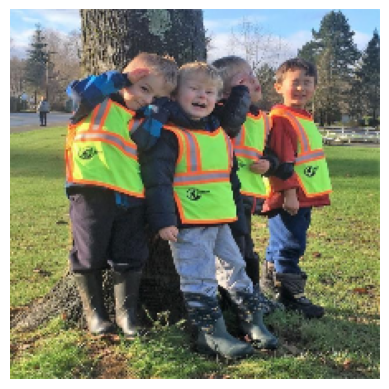

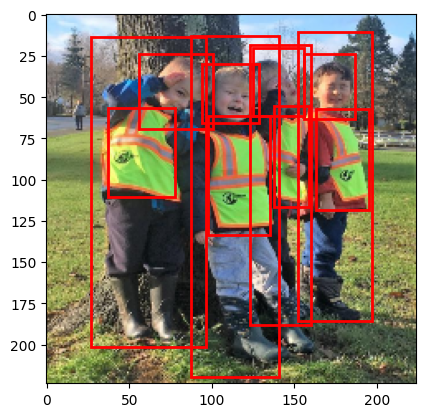

[['5', '0.4359375', '0.275', '0.603125', '0.5953125'],
 ['5', '0.615625', '0.246875', '0.7078125', '0.521875'],
 ['5', '0.1640625', '0.253125', '0.346875', '0.49375'],
 ['5', '0.728125', '0.2546875', '0.871875', '0.5296875'],
 ['2', '0.2484375', '0.10625', '0.45', '0.309375'],
 ['2', '0.41875', '0.1328125', '0.5734375', '0.29375'],
 ['2', '0.5578125', '0.090625', '0.696875', '0.275'],
 ['2', '0.696875', '0.10625', '0.8328125', '0.2828125'],
 ['4', '0.1203125', '0.0609375', '0.4296875', '0.9'],
 ['4', '0.3890625', '0.0578125', '0.628125', '0.98125'],
 ['4', '0.5484375', '0.0828125', '0.715625', '0.8390625'],
 ['4', '0.6796875', '0.046875', '0.8796875', '0.828125']]

In [12]:
import matplotlib.patches as patches

plt.figure()  # Установите размер графика

# Отображение изображения

plt.imshow(img_data[0])

# print(img_data[2])

# Отключение осей (опционально)
plt.axis('off')

fig, ax = plt.subplots(1)


ax.imshow(img_data[0])


for el in img_data[1]:
  x,y =   float(el[1]) * 224 ,   float(el[2]) * 224
  w,h =   float(el[3]) * 224 ,   float(el[4]) * 224


  w = w - x
  h =  h - y 

  rect = patches.Rectangle((x, y), w , h, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

# Показать график
plt.show()
img_data[1]

In [13]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
num_layers_to_keep = 119
output_tensor = base_model.layers[num_layers_to_keep - 1].output
clipped_model = tf.keras.Model(inputs=base_model.input, outputs=output_tensor)
for layer in clipped_model.layers[:80]:
    layer.trainable = False

In [14]:
inputs = Input((224, 224 ,3))
x = clipped_model(inputs)
x = Dropout(0.3)(x)
box_probabilities = Conv2D(2, kernel_size=1, activation = 'softmax')(x)
box_probabilities = Dropout(0.2)(box_probabilities)
box_coords = Conv2D(4, kernel_size=1, activation = 'linear')(x)
box_coords = Dropout(0.2)(box_coords)
outputs = [box_probabilities, box_coords]
RP_network = keras.Model(inputs, outputs)

In [15]:
RP_network.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional (Functional)       │ (None, 14, 14, 576)       │         616,256 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 14, 14, 576)       │               0 │ functional[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 14, 14, 2)         │           1,154 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 14, 14, 4)         │           2,308 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 14, 14, 2)         │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 14, 14, 4)         │               0 │ conv2d_1[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 619,718 (2.36 MB)

 Trainable params: 417,350 (1.59 MB)

 Non-trainable params: 202,368 (790.50 KB)

In [16]:
import random
import tensorflow as tf
import matplotlib.image as mpimg

def generator():
    path = r'C:\Users\Ильяс\.cache\roboflow\PPE.v14i.yolokeras\update__annotations.txt'
    data = open(path, 'r').readlines()
    for el in data:
        path_image = el.replace('\n','')
        path_label = 'C:\\Users\\Ильяс\\.cache\\roboflow\\PPE.v14i.yolokeras\\train\\labels\\' +\
          path_image.split('\\')[-1].replace('\n','') + '.txt'
        
        label = open(path_label, 'r').readlines()
        bbox = []
        
        for e in label:
            if len(e) <= 1:
                break
            li = e.split()[1:]
            x, y = float(li[0]) * 224, float(li[1]) * 224
            w, h = float(li[2]) * 224, float(li[3]) * 224
            bbox.append([x, y, w, h])
            if len(bbox) == 50:
                break
        else:
            image = tf.image.resize(mpimg.imread(path_image), (224, 224)) / 255
            
            # Случайный выбор угла поворота (0, 90, 180 или 270 градусов)
            rotation = random.choice([0])
            
            # Поворот изображения
            rotated_image = tf.image.rot90(image, k=rotation)
            
            # Корректировка bounding boxes в зависимости от поворота
            rotated_bbox = []
            for box in bbox:
                x, y, w, h = box
                if rotation == 1:  # 90 градусов
                    new_x = y
                    new_y = 224 - x - w
                    new_w = h
                    new_h = w
                elif rotation == 2:  # 180 градусов
                    new_x = 224 - x - w
                    new_y = 224 - y - h
                    new_w = w
                    new_h = h
                elif rotation == 3:  # 270 градусов
                    new_x = 224 - y - h
                    new_y = x
                    new_w = h
                    new_h = w
                else:  # 0 градусов (без поворота)
                    new_x, new_y, new_w, new_h = x, y, w, h
                
                rotated_bbox.append([new_x, new_y, new_w, new_h])
            
            yield (rotated_image, rotated_bbox)

    


dataset = tf.data.Dataset.from_generator(generator, output_signature=(tf.TensorSpec(shape=(224, 224, 3), dtype=tf.float32),
                                                                     tf.TensorSpec(shape=(None, 4), dtype=tf.float32)))
# для лучшего результата при обучении
dataset = dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE).shuffle(100)

class RPNModel(keras.Model):
    def __init__(self, network):
        super().__init__()
        self.network = network
        self.lr = 1e-4
        self.optimizer = tf.keras.optimizers.Adam(self.lr)
        self.crossentropy = tf.keras.losses.CategoricalCrossentropy(reduction = 'none')
        self.hubert = tf.keras.losses.Huber(reduction = 'none')

    def draw_box(self, image, box, color = (255, 0, 0)):
        image = cv2.rectangle(image,
                              (int(tf.clip_by_value(box[0], 0, 244)), int(tf.clip_by_value(box[1], 0, 244))),
                              (int(tf.clip_by_value(box[2], 0, 244)), int(tf.clip_by_value(box[3], 0, 244))),
                              color, 1)
        return image

    #не используется
    def draw_transparent_box(self, image, box, color):
        overlay = image.copy()
        x, y, w, h = box
        x = int(tf.clip_by_value(x, 0, 244))
        y = int(tf.clip_by_value(y, 0, 244))
        w = int(tf.clip_by_value(w, 0, 244))
        h = int(tf.clip_by_value(h, 0, 244))

        cv2.rectangle(overlay, (x, y), (w, h), (100, 100, 100), -1)
        color = 1 - color
        alpha = color/500
        image_new = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
        return image_new

    def IoU(self, boxA, boxB):
        boxes = tf.concat([tf.expand_dims(boxA, axis = 0), tf.expand_dims(boxB, axis = 0)], axis = 0)
        A = tf.reduce_max(boxes, axis = 0)
        B = tf.reduce_min(boxes, axis = 0)
        xA = A[:, 0]
        yA = A[:, 1]
        xB = B[:, 2]
        yB = B[:, 3]

        interW = tf.nn.relu(xB - xA + 1)
        interH = tf.nn.relu(yB - yA + 1)

        interArea = interW * interH
        boxAArea = (boxA[:, 2] - boxA[:, 0] + 1) * (boxA[:, 3] - boxA[:, 1] + 1)
        boxBArea = (boxB[:, 2] - boxB[:, 0] + 1) * (boxB[:, 3] - boxB[:, 1] + 1)

        iou = interArea / tf.cast(boxAArea + boxBArea - interArea, dtype=tf.float32)
        return iou

    
    def non_maximum_supression(self, boxes, scores, th = 0.6):
        num_boxes = boxes.shape[0]
        axis_A = tf.repeat(tf.expand_dims(boxes, axis = 0), num_boxes, axis = 0)
        axis_B = tf.tile(tf.expand_dims(boxes, axis=1), multiples=[1, num_boxes, 1])
        axis_A = tf.reshape(axis_A, [-1, 4])
        axis_B = tf.reshape(axis_B, [-1, 4])
        cross_iou = self.IoU(axis_A, axis_B)
        resulted_boxes = []
        resulted_scores = []
        for i in range(num_boxes):
            discard = False
            for j in range(num_boxes):
                if (cross_iou[i * num_boxes + j] > th):
                    if(scores[j, 1] > scores[i, 1]):
                        discard = True
                        break
            if not discard:
                resulted_boxes.append(boxes[i])
                resulted_scores.append(scores[i])
        resulted_boxes = tf.cast(resulted_boxes, dtype = tf.float32)
        resulted_scores = tf.cast(resulted_scores, dtype = tf.float32)
        return (resulted_boxes, resulted_scores)

    def testing(self, image = None, only_true = False, t = 0.5, top_k = None, nms = False):
        if image == None:
            for data in dataset.take(1):
                image, bounding_boxes = data

        image = tf.expand_dims(image, axis=0)
        result = self.network(image)
        image = (image+1)/2
        delta = 17.0
        shift = self.create_position_tensor(14)


        probabilities, coords = result
        coords += shift
        coords *= 17.0
        coords = tf.clip_by_value(coords, 0, 244)
        predicted_coords = tf.reshape(coords, [-1, 4])
        predicted_probs = tf.reshape(probabilities, [-1, 2])
        image = image[0].numpy()
        if nms:
            predicted_coords, predicted_probs = self.non_maximum_supression(predicted_coords, predicted_probs)
        top_boxes = []
        for i in range(predicted_coords.shape[0]):

            prob = float(predicted_probs[i, 1].numpy())
            if(top_k == None):
                if only_true == False or prob > t:
                    image = self.draw_box(image, predicted_coords[i], color = (prob, prob, prob))
            else:
                top_boxes.append([predicted_coords[i], prob])
        if (top_k != None):
            top_boxes = sorted(top_boxes, key=lambda box: box[1])
            for i in range(top_k):
                prob = top_boxes[-i - 1][1]
                image = self.draw_box(image, top_boxes[-i - 1][0], color = (prob, prob, prob))

        plt.imshow(image)

    def create_mask(self, n, s, at_beginning=True):
        if at_beginning:
            mask = tf.concat([tf.ones([n], dtype=tf.float32), tf.zeros([s - n], dtype=tf.float32)], axis=0)
        else:
            mask = tf.concat([tf.zeros([s - n], dtype=tf.float32), tf.ones([n], dtype=tf.float32)], axis=0)
        return mask

    def random_sample(self, length, num_ones):
        indices = tf.range(length)
        shuffled_indices = tf.random.shuffle(indices)
        return tf.cast((shuffled_indices<num_ones), dtype = tf.float32)

    def count_in_tensor(self, tensor, th, more = False):
        if more:
            true_positions = tf.cast(tensor > th, dtype = tf.float32)
        else:
            true_positions = tf.cast(tensor < th, dtype = tf.float32)
        return tf.reduce_sum(true_positions)

    def calculate_loss(self, pred_probs, pred_boxes, gt, minibatch_size = 64, alpha = 1, low_th = 0.3, high_th = 0.7):
        num_pred = pred_boxes.shape[0]
        num_gt = gt.shape[0]
        r_pred = tf.repeat(tf.expand_dims(pred_boxes, axis = 0), num_gt, axis = 0)
        r_gt = tf.tile(tf.expand_dims(gt, axis=1), multiples=[1, num_pred, 1])
        r_gt = tf.reshape(r_gt, shape=[-1, num_pred, 4])
        r_pred = tf.reshape(r_pred, [-1, 4])
        r_gt = tf.reshape(r_gt, [-1, 4])
        iou = self.IoU(r_pred, r_gt)
        iou = tf.reshape(iou, [num_gt, num_pred])
        max_iou_arg = tf.argmax(iou, axis = 0)
        corresponding_pred = pred_boxes
        corresponding_prob = pred_probs
        corresponding_gt = tf.gather(gt, max_iou_arg)
        iou_rates = tf.reduce_max(iou, axis = 0)
        indexes = tf.argsort(iou_rates, direction='ASCENDING')
        corresponding_pred = tf.gather(corresponding_pred, indexes)
        corresponding_prob = tf.gather(corresponding_prob, indexes)
        corresponding_gt = tf.gather(corresponding_gt, indexes)
        iou_rates = tf.gather(iou_rates, indexes)
        positive_true = tf.repeat(tf.expand_dims(tf.one_hot(1, 2), axis = 0), num_pred, axis = 0)
        negative_true = tf.repeat(tf.expand_dims(tf.one_hot(0, 2), axis = 0), num_pred, axis = 0)

        regression_loss = self.hubert(corresponding_pred, corresponding_gt)

        num_less_than_low_th = self.count_in_tensor(iou_rates, low_th, more = False)
        num_more_than_high_th = self.count_in_tensor(iou_rates, high_th, more = True)

        num_more_than_high_th = tf.maximum(num_more_than_high_th, minibatch_size//2)
        num_less_than_low_th = tf.maximum(num_less_than_low_th, minibatch_size//2)

        positive_sample_mask = tf.concat([tf.zeros([num_pred - num_more_than_high_th], dtype = tf.float32),
                                          self.random_sample(num_more_than_high_th, minibatch_size//2)], axis = 0)
        negative_sample_mask = tf.concat([self.random_sample(num_less_than_low_th, minibatch_size//2),
                                          tf.zeros([num_pred - num_less_than_low_th], dtype = tf.float32)], axis = 0)

        positive_loss = (self.crossentropy(positive_true, corresponding_prob) + regression_loss * alpha) * positive_sample_mask
        negative_loss = (self.crossentropy(negative_true, corresponding_prob)) * negative_sample_mask

        loss = tf.reduce_sum(negative_loss + positive_loss)

        return [loss, num_less_than_low_th, num_more_than_high_th]

    def create_position_tensor(self, n):
        x_positions = tf.linspace(0.0, float(n - 1), n)
        y_positions = tf.linspace(0.0, float(n - 1), n)
        x_grid, y_grid = tf.meshgrid(x_positions, y_positions)
        position_tensor = tf.stack([x_grid, y_grid, x_grid, y_grid], axis=-1)
        return position_tensor

    @tf.function
    def train_step(self, image, gt_boxes):
        image = tf.expand_dims(image, axis=0)
        delta = 16 #соотношение стороны карты признаков и исходной картинки
        shift = self.create_position_tensor(14)

        with tf.GradientTape() as tape:
            result = self.network(image)
            probabilities, coords = result
            #преобразование координат из относительных в абсолютные
            coords += shift
            coords *= 17.0
            coords = tf.clip_by_value(coords, 0, 244) #проверьте, может так будет лучше
            predicted_coords = tf.reshape(coords, [-1, 4])
            predicted_probs = tf.reshape(probabilities, [-1, 2])
            loss, a, b = self.calculate_loss(predicted_probs, predicted_coords, gt_boxes, minibatch_size = 64)
            gradients = tape.gradient(loss, self.network.trainable_variables)
            self.optimizer.apply_gradients(zip(gradients, self.network.trainable_variables))

        return [tf.reduce_mean(loss), a, b]

model = RPNModel(RP_network)


In [17]:
gen = generator()

In [18]:
next(generator())

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.74089634, 0.88599443, 0.9918768 ],
         [0.7476191 , 0.88963586, 0.99243695],
         [0.7481793 , 0.8893558 , 0.99131656],
         ...,
         [0.60018003, 0.8315526 , 0.98841536],
         [0.6011205 , 0.832493  , 0.98935574],
         [0.6159664 , 0.8473389 , 1.        ]],
 
        [[0.7231893 , 0.8744498 , 0.9864946 ],
         [0.7341737 , 0.8878551 , 0.99263704],
         [0.74845934, 0.89271706, 0.99577826],
         ...,
         [0.59467775, 0.8260503 , 0.982913  ],
         [0.5923369 , 0.8237095 , 0.9805722 ],
         [0.60084033, 0.83221287, 0.9890756 ]],
 
        [[0.6997199 , 0.8605042 , 0.9785114 ],
         [0.69913965, 0.85992396, 0.977571  ],
         [0.70252097, 0.8563626 , 0.9691877 ],
         ...,
         [0.60342133, 0.83479387, 0.9916566 ],
         [0.59607846, 0.827451  , 0.9843137 ],
         [0.60018015, 0.83155274, 0.9884155 ]],
 
        ...,
 
        [[0.51110536, 0.5738505 

In [19]:
len([el for el in gen])

3721

In [20]:
for data in dataset.take(1):
    image, bounding_boxes = data
    print(model.train_step(image, bounding_boxes))

[<tf.Tensor: shape=(), dtype=float32, numpy=2643.14599609375>, <tf.Tensor: shape=(), dtype=float32, numpy=196.0>, <tf.Tensor: shape=(), dtype=float32, numpy=32.0>]


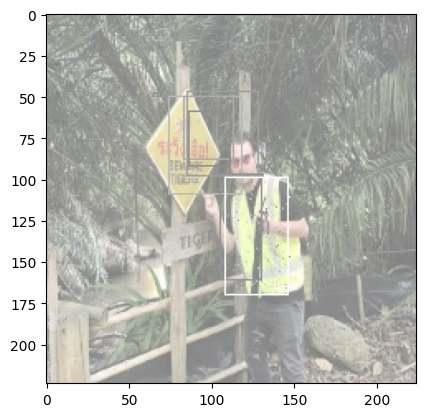

In [27]:
model.testing(only_true = True, t = 0.5, nms = True)

эпоха 21
ошибка: 146.02957153320312
tf.Tensor(128.0, shape=(), dtype=float32) tf.Tensor(32.0, shape=(), dtype=float32)


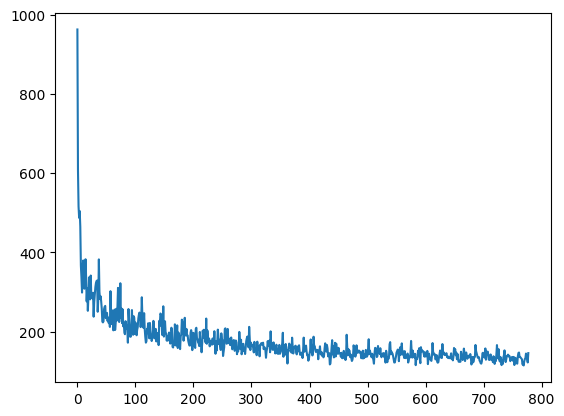

KeyboardInterrupt: 

In [22]:
epochs = 500
hist = np.array(np.empty([0]))
best_loss = 100000
from IPython.display import clear_output
for epoch in range(epochs):
    midloss = 0
    for step, x in enumerate(dataset):
        
        image, bounding_boxes = x
        loss, test1, test2 = model.train_step(image, bounding_boxes)
           
        midloss += loss
        if(step % 100 == 99):  
            clear_output(wait=True)
            print('эпоха ' + str(epoch))
            print('ошибка: ' + str(float(midloss/100)))
            print(test1, test2)
           
            hist = np.append(hist, float(midloss/100))
            plt.plot(np.arange(0,len(hist)), hist)
            plt.show()
            
            if step % 3 == 0:
                best_loss = midloss/100
                model.network.save('best.h5')
                
            midloss = 0

In [ ]:
def update(file_path: str, root: str):
    with open(file_path, "r") as file:
        paths = file.readlines()

    updated_paths = list[str]()
    for path in paths:
        path = path.strip()
        updated_paths.append(root + path.split()[0] + "\n")

    new_file_path = "C:\\Users\\Ильяс\\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\update_test_" + os.path.basename(file_path).split()[0]

    with open(new_file_path, "w") as file:
        file.writelines(updated_paths)

    print("Updated file created successfully: " + new_file_path)

In [ ]:
root = "C:\\Users\\Ильяс\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\test\\"
update(file_path=r"C:\\Users\\Ильяс\\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\test\\_annotations.txt", root=root)

In [ ]:
def create_labels(file_path : str):
    with open(file_path, 'r') as file:

        lines = file.readlines()
        
        labels = []
        names = []
        for line in lines:
            w, h = PIL.Image.open('C:\\Users\\Ильяс\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\test\\' + line.split()[0]).size
            li = [el for el in line.split()]
            for i,el in enumerate(li[1:]):
                el = el.split(',')
                print(el)
                el = ' '.join([el[-1]] + [str(int(e) / (w if j % 2 == 0 else h) ) for j, e in enumerate(el[:-1])])
                print(el)
                li[i + 1] = el

            
                    
            labels.append('\n'.join(li[1:]) if len(li) > 1 else ' ')
            names.append(li[0])

    for i, name in enumerate(names):
        labels_path = 'C:\\Users\\Ильяс\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\test\\labels\\' + name + '.txt'
        with open(labels_path, 'w') as file:
            file.write(labels[i])
            

In [ ]:
create_labels(file_path=r"C:\\Users\\Ильяс\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\test\\_annotations.txt")

In [ ]:
def get_data():
  path = 'C:\\Users\\Ильяс\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\update_test__annotations.txt'
  data = open(path, 'r').readlines()
  for el in data:
    path_image = el[:-1]
    path_label = 'C:\\Users\\Ильяс\.cache\\roboflow\\PPEs.v8-allclasses-roboflow-fast-model.yolokeras\\test\\labels\\' +\
      path_image.split('\\')[-1] + '.txt'

    label = open(path_label, 'r').readlines()
    label = [el.split() for el in label]

    image = tf.image.resize(mpimg.imread(path_image),(224, 224)) / 255
    
    yield [image, label, PIL.Image.open(path_image).size]

data = get_data()

In [ ]:
import matplotlib.patches as patches

img_data = next(data)

plt.figure()  # Установите размер графика

# Отображение изображения

plt.imshow(img_data[0])

# print(img_data[2])

# Отключение осей (опционально)
plt.axis('off')

fig, ax = plt.subplots(1)


ax.imshow(img_data[0])


for el in img_data[1]:
  x,y =   float(el[1]) * 224 ,   float(el[2]) * 224
  w,h =  float(el[3]) * 224 ,   float(el[4]) * 224


  w = w - x
  h = h - y

  rect = patches.Rectangle((x, y), w , h, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

# Показать график
plt.show()
img_data[1]

In [ ]:
def generator():
  path = 'C:\\Users\\Ильяс\.cache\\roboflow\\PPE.v14i.yolokeras\\update__annotations.txt'
  data = open(path, 'r').readlines()
  for el in data:
    path_image = el.replace('\n','')
    path_label = 'C:\\Users\\Ильяс\.cache\\roboflow\\PPE.v14i.yolokeras\\train\\labels\\' +\
      path_image.split('\\')[-1].replace('\n','') + '.txt'
    
    label = open(path_label, 'r').readlines()
    bbox = []


    
    for e in label:
        if len(e) <= 1:
            break
        li = e.split()[1:]
        x,y = float(li[0]) * 224, float(li[1]) * 224
        w, h = float(li[2]) * 224, float(li[3]) * 224
        bbox.append([x, y, w ,  h ])
        if len(bbox) == 50:
          break
    else:
        image = tf.image.resize(mpimg.imread(path_image),(224, 224)) / 255
    
        yield (image,bbox)


dataset = tf.data.Dataset.from_generator(generator, output_signature=(tf.TensorSpec(shape=(224, 224, 3), dtype=tf.float32),
                                                                     tf.TensorSpec(shape=(None, 4), dtype=tf.float32)))
# для лучшего результата при обучении
dataset = dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE).shuffle(100)



In [ ]:
for data in dataset.take(1):
    image, bounding_boxes = data
    print(model.train_step(image, bounding_boxes))

In [ ]:
model.testing(only_true = True, t = 0.5, nms = True)

In [ ]:
epochs = 500
hist = np.array(np.empty([0]))
best_loss = 100000
from IPython.display import clear_output
for epoch in range(epochs):
    midloss = 0
    for step, x in enumerate(dataset):
        
        image, bounding_boxes = x
        loss, test1, test2 = model.train_step(image, bounding_boxes)
           
        midloss += loss
        if(step % 100 == 99):  
            clear_output(wait=True)
            print('эпоха ' + str(epoch))
            print('ошибка: ' + str(float(midloss/100)))
            print(test1, test2)
           
            hist = np.append(hist, float(midloss/100))
            plt.plot(np.arange(0,len(hist)), hist)
            plt.show()
            #сохранять лучший вариант
            if (midloss/100 < best_loss):
                best_loss = midloss/100
                model.network.save('best.h5')
                
            midloss = 0